# Rectangular Reinforced Concrete Column Section Analysis

#### Job:  2220805-01 Polk Street Parking Garage
#### Made By:  WJL 2022-12-09
#### Checked By:  BJT 2022-12-09

## Column Identification:  Type A

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from sectionproperties.pre.library.concrete_sections import concrete_column_section
import sectionproperties.pre.library.primitive_sections as sections
from sectionproperties.analysis.section import Section
from prettytable import PrettyTable

In [3]:
# User Input
fc = 3.5                             # Compressive strength concrete, ksi
fy = 53.7                            # Yield strength steel, ksi
x = 34                             # column dimension in the X direction, in
y = 34                            # column dimension in the X direction, in
dbar = 1.5                           # bar diameter, in
cc = 2.5                             # distance from edge to center of rebar, in

rebar_layout = np.array([[1, 1],
                         [1, 1]])

In [4]:


# Functions

def steel_props():
    Ast = math.pi / 4 * dbar**2
    Ast_layout = Ast * rebar_layout
    nby, nbx = np.shape(Ast_layout)
    AstTop = np.sum(Ast_layout, axis = 1)[0]
    AstBottom = np.sum(Ast_layout, axis = 1)[-1]
    dsTop = cc
    dsBottom = y - cc
    E = 29000
    ey = fy / E
    return Ast, Ast_layout, nby, nbx, E, ey, AstTop, AstBottom, dsTop, dsBottom

def conc_props():
    Ec = 57000 * math.sqrt(fc * 1000)
    if fc <= 4.:
        beta1 = 0.85
    elif fc < 8:
        beta1 = 0.85 - 0.05*(fc-4)
    else:
        beta1 = 0.65
    ec = 0.003
    Ag = x * y
    return Ec, beta1, ec, Ag

def safety_factor(e):
    if abs(e) <= ey:
        phi, classification = 0.65, 'CC'
    elif abs(e) < ey + 0.003:
        phi, classification = 0.65+0.25*(abs(e)-ey)/(0.003), 'Tr'
    else:
        phi, classification = 0.90, 'TC'
    return 1.5/phi, classification
    
def stress_strain():
    if c > ysBottom + dbar / 2:
        Acc = x * a - (AstTop - AstBottom)
        esBottom = ec / c * (c - ysBottom)
        fsBottom = min(fy, esBottom * E)
        esTop =ec / c * (c - ysTop)
        fsTop = min(fy, esTop * E)             
    elif c > ysTop + dbar / 2:
        Acc = x * a - AstTop
        esBottom = -1 * ec / c * (ysBottom - c)
        fsBottom = max(-fy, esBottom * E)  
        esTop =ec / c * (c - ysTop)
        fsTop = min(fy, esTop * E) 
    else:
        Acc = x * a
        esBottom = -1 * ec / c * (ysBottom - c)
        fsBottom = max(-fy, esBottom * E) 
        esTop = -1 * ec / c * (ysTop - c)
        fsTop = max(-fy, esTop * E) 
    return Acc, fsBottom, fsTop, esBottom
    
def calc_forces():
    Cc = 0.85 * fc * Acc
    FsTop = fsTop * AstTop
    FsBottom = fsBottom * AstBottom
    P = min(0.80*P0, Cc + FsTop + FsBottom)
    M = Cc*(y/2 - a/2) + FsTop*(y/2 - ysTop) + FsBottom*(y/2 - ysBottom)
    return P, M

def section_analysis():
    geometry = sections.rectangular_section(b=x, d=y)
    geometry.create_mesh(mesh_sizes=[0.1])
    section = Section(geometry)
    section.calculate_geometric_properties()
    section.display_results(fmt='.3f')
    section.plot_centroids()
    
def rc_section_plot():
    geometry = concrete_column_section(x, y, cc-dbar/2, nbx, nby, dbar, math.pi/4 * dbar**2, n_circle=20)
    geometry.plot_geometry()
    
def input_echo():
    echo = PrettyTable()
    nfmt = '{:.3f}'
    echo.field_names = ["Parameter", "Value", "Unit"]
    echo.add_rows(
        [
            ["Concrete compressive strength", nfmt.format(fc), "ksi"],
            ["Yield strength of reinforcement", nfmt.format(fy), "ksi"],
            ["Column gross width in X dimension", nfmt.format(x), "in"],
            ["Column gross width in Y dimension", nfmt.format(y), "in"],
            ["Diameter of reinforcement", nfmt.format(dbar), "in"],
            ["Distance from edge to center of reinforcement", nfmt.format(cc), "in"],
            ["Rebar pattern layout", rebar_layout, ""]
        ])
    echo.align["Value"] = "r"
    echo.align["Parameter"] = "r"
    echo.align["Unit"] = "l"
    print(echo)

def interaction_diagram_keyvals():
    max_axial_load = [Pax[0], Pay[0]]
    
    
    
    


#### Input Echo

In [5]:
# Input Echo with PrettyTable
input_echo()


+-----------------------------------------------+---------+------+
|                                     Parameter |   Value | Unit |
+-----------------------------------------------+---------+------+
|                 Concrete compressive strength |   3.500 | ksi  |
|               Yield strength of reinforcement |  53.700 | ksi  |
|             Column gross width in X dimension |  34.000 | in   |
|             Column gross width in Y dimension |  34.000 | in   |
|                     Diameter of reinforcement |   1.500 | in   |
| Distance from edge to center of reinforcement |   2.500 | in   |
|                          Rebar pattern layout |  [[1 1] |      |
|                                               |  [1 1]] |      |
+-----------------------------------------------+---------+------+


## Gross Section Properties
Note:  Elastic Section Modulus ('S') and Plastic Section Modulus ('Z') are reversed in the table below.

# X-X Axis

C:\Users\wlynes\Anaconda3\envs\SectionProperties\lib\site-packages\sectionproperties\analysis\section.py:198: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.mesh_search_tree = STRtree(p_mesh)


   Section Properties    
┏━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Property ┃      Value ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━┩
│ A        │   1156.000 │
│ Perim.   │    136.000 │
│ Qx       │  19652.000 │
│ Qy       │  19652.000 │
│ cx       │     17.000 │
│ cy       │     17.000 │
│ Ixx_g    │ 445445.333 │
│ Iyy_g    │ 445445.333 │
│ Ixy_g    │ 334084.000 │
│ Ixx_c    │ 111361.333 │
│ Iyy_c    │ 111361.333 │
│ Ixy_c    │      0.000 │
│ Zxx+     │   6550.667 │
│ Zxx-     │   6550.667 │
│ Zyy+     │   6550.667 │
│ Zyy-     │   6550.667 │
│ rx       │      9.815 │
│ ry       │      9.815 │
│ phi      │      0.000 │
│ I11_c    │ 111361.333 │
│ I22_c    │ 111361.333 │
│ Z11+     │   6550.667 │
│ Z11-     │   6550.667 │
│ Z22+     │   6550.667 │
│ Z22-     │   6550.667 │
│ r11      │      9.815 │
│ r22      │      9.815 │
└──────────┴────────────┘

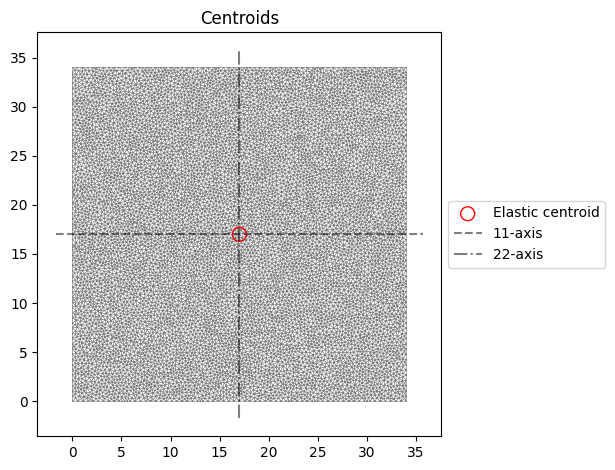

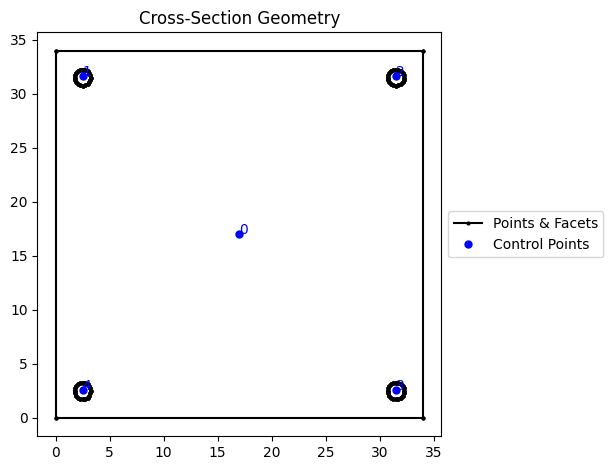

In [6]:
# Major Axis (x-x)

# get the steel properties
Ast, Ast_layout, nby, nbx, E, ey, AstTop, AstBottom, ysTop, ysBottom = steel_props()

# get the concrete properties
Ec, beta1, ec, Ag = conc_props()

# Initialize arrays
Pnx = []
Mnx = []
Pax = []
Max = []


# Iterate through depths of c, from bottom of section to top of section beginning with pure compression
P0 = 0.85 * fc * (Ag - (AstTop + AstBottom)) + fy * (AstTop + AstBottom)
Pnx.append(0.80*P0)
Mnx.append(0.)
Pax.append(0.80*P0/(1.50/0.65))
Max.append(0.)



c = y

while c >= 0.:
    conv = 0.001
    a = beta1 * c
    Acc, fsBottom, fsTop, esBottom = stress_strain()
    W, classification = safety_factor(esBottom)
    P, M = calc_forces()
    Pnx.append(P)
    Mnx.append(M/12)
    Pax.append(P/W)
    Max.append((M/12)/W)  
    c -= y/1000

section_analysis()
rc_section_plot()

# Y-Y Axis

   Section Properties    
┏━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Property ┃      Value ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━┩
│ A        │   1156.000 │
│ Perim.   │    136.000 │
│ Qx       │  19652.000 │
│ Qy       │  19652.000 │
│ cx       │     17.000 │
│ cy       │     17.000 │
│ Ixx_g    │ 445445.333 │
│ Iyy_g    │ 445445.333 │
│ Ixy_g    │ 334084.000 │
│ Ixx_c    │ 111361.333 │
│ Iyy_c    │ 111361.333 │
│ Ixy_c    │      0.000 │
│ Zxx+     │   6550.667 │
│ Zxx-     │   6550.667 │
│ Zyy+     │   6550.667 │
│ Zyy-     │   6550.667 │
│ rx       │      9.815 │
│ ry       │      9.815 │
│ phi      │      0.000 │
│ I11_c    │ 111361.333 │
│ I22_c    │ 111361.333 │
│ Z11+     │   6550.667 │
│ Z11-     │   6550.667 │
│ Z22+     │   6550.667 │
│ Z22-     │   6550.667 │
│ r11      │      9.815 │
│ r22      │      9.815 │
└──────────┴────────────┘

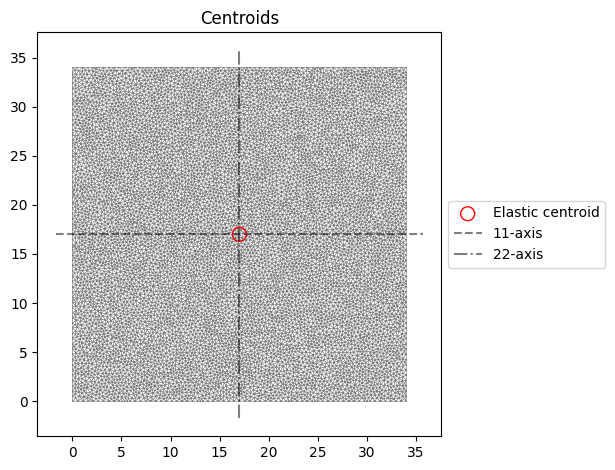

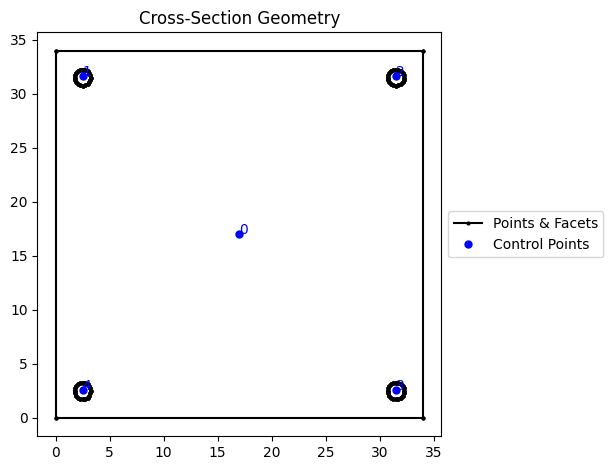

In [7]:
# Minor Axis (y-y)

# switch the x/y values
xtemp = y
ytemp = x
Ast_layout_temp = np.transpose(Ast_layout)
x = xtemp
y = ytemp
Ast_layout = Ast_layout_temp

# get the steel properties
Ast, Ast_layout, nby, nbx, E, ey, AstTop, AstBottom, ysTop, ysBottom = steel_props()

# get the concrete properties
Ec, beta1, ec, Ag = conc_props()

# Initialize arrays
Pny = []
Mny = []
Pay = []
May = []

# Iterate through depths of c, from bottom of section to top of section beginning with pure compression
P0 = 0.85 * fc * (Ag - (AstTop + AstBottom)) + fy * (AstTop + AstBottom)
Pny.append(0.80*P0)
Mny.append(0.)
Pay.append(0.80*P0/(1.50/0.65))
May.append(0.)

c = y

while c >= 0.:
    a = beta1 * c
    Acc, fsBottom, fsTop, esBottom = stress_strain()
    W, classification = safety_factor(esBottom)
    P, M = calc_forces()
    Pny.append(P)
    Mny.append(M/12)
    Pay.append(P/W)
    May.append((M/12)/W)
    c -= y/1000

section_analysis()
rc_section_plot()

## Interaction Diagrams
The nominal strengths and resistance factors (𝜙) were calculated in accordance with the Load and Resistance Design (LRFD) methodology and ACI 318-19.  It is convenient to use the Allowable Strength Design (ASD) methodology for analysis.  The service-level loads and safety factors considered in ASD are more directly communicated to personnel.

The following diagrams show ASD allowable strengths (Pn / Ω) that were converted by the LRFD factored resistance (𝜙Pn) by the following expressions:
$\Omega = \frac{1.5}{\phi}$ ∴ $ \frac{P_n}{\Omega} = \frac{\phi P_n}{1.5}$ and $ \frac{M_n}{\Omega} = \frac{\phi M_n}{1.5} $

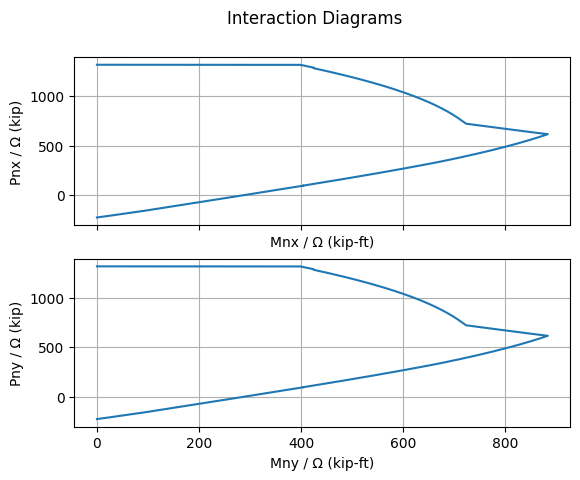

In [8]:
# Plot interaction diagrams

fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
fig.suptitle('Interaction Diagrams')
ax1.plot(Max, Pax)
ax1.set(xlabel = 'Mnx / \u03A9 (kip-ft)', ylabel = 'Pnx / \u03A9 (kip)')
ax1.grid()
ax2.plot(May, Pay)
ax2.set(xlabel = 'Mny / \u03A9 (kip-ft)', ylabel = 'Pny / \u03A9 (kip)')
ax2.grid()
plt.show()